In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from keras import backend as keras
from tensorflow import keras

import numpy as np

In [65]:
import os
test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb01" in x or "chb02" in x or "chb03" in x]
cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if not "chb01" in x and "chb" in x]

In [59]:
from data import generate_balanced_pre_ictal_train_data
generate_balanced_pre_ictal_train_data(256, 256, cases, 40)

c:\Users\angus\Documents\cs408-eeg-python\data.py:192: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(seizure_data.filename, verbose=False)
c:\Users\angus\Documents\cs408-eeg-python\data.py:192: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(seizure_data.filename, verbose=False)
c:\Users\angus\Documents\cs408-eeg-python\data.py:192: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(seizure_data.filename, verbose=False)
c:\Users\angus\Documents\cs408-eeg-python\data.py:192: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(seizure_data.filename, verbose=False)
c:\Users\angus\Documents\cs408-eeg-p

In [127]:
from seizure_sequence import SeizureSequence

seizure_sequence_balanced = SeizureSequence(1, "ml_processed_balanced_pre_ictal", test_cases, bias_positive=False)
# data, labels = seizure_sequence.__getitem__(1)
print(seizure_sequence_balanced.get_files())

['chb01_03.edf_pre_ictal', 'chb01_03.edf_pre_ictal', 'chb01_04.edf_pre_ictal', 'chb01_04.edf_pre_ictal', 'chb01_15.edf_pre_ictal', 'chb01_15.edf_pre_ictal', 'chb01_16.edf_pre_ictal', 'chb01_16.edf_pre_ictal', 'chb01_18.edf_pre_ictal', 'chb01_18.edf_pre_ictal', 'chb01_21.edf_pre_ictal', 'chb01_21.edf_pre_ictal', 'chb01_26.edf_pre_ictal', 'chb01_26.edf_pre_ictal', 'chb02_16+.edf_pre_ictal', 'chb02_16+.edf_pre_ictal', 'chb02_16.edf_pre_ictal', 'chb02_16.edf_pre_ictal', 'chb02_19.edf_pre_ictal', 'chb02_19.edf_pre_ictal', 'chb03_01.edf_pre_ictal', 'chb03_01.edf_pre_ictal', 'chb03_02.edf_pre_ictal', 'chb03_02.edf_pre_ictal', 'chb03_03.edf_pre_ictal', 'chb03_03.edf_pre_ictal', 'chb03_04.edf_pre_ictal', 'chb03_04.edf_pre_ictal', 'chb03_34.edf_pre_ictal', 'chb03_34.edf_pre_ictal', 'chb03_35.edf_pre_ictal', 'chb03_35.edf_pre_ictal', 'chb03_36.edf_pre_ictal', 'chb03_36.edf_pre_ictal']


In [128]:
from model import create_model, compile_model
model = compile_model(create_model())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 21, 512)           393728    
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 10, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 8, 256)            393472    
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 4, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 2, 128)            98432     
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 1, 128)          

In [129]:
history = model.fit(seizure_sequence_balanced, epochs=100)
# data = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_data.npy")
# labels = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_labels.npy")
# history = model.fit(data, labels, epochs=10000)

Epoch 1/100
34/34 [==============================] - 1s 12ms/step - loss: 0.6931 - accuracy: 0.5011
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5022
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5011
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.4993
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5136
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.5202
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5423
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.5676
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.5276
Epoch 11

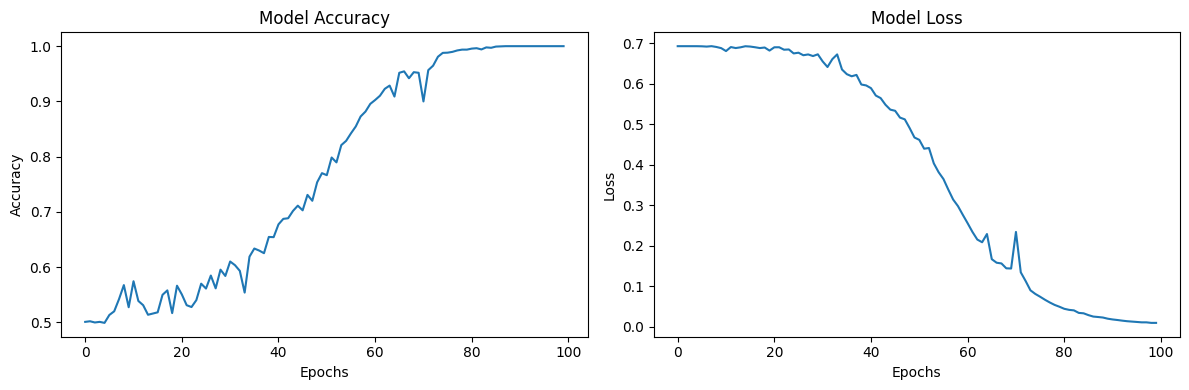

In [130]:
from model import accuracy_loss_plot
accuracy_loss_plot(history)

In [131]:
whole_file_data = np.load("ml_processed/chb01_03.edf_data.npy")
whole_file_labels = np.load("ml_processed/chb01_03.edf_labels.npy")
# whole_file_labels = np.load("ml_processed/chb04_08.edf_labels.npy")
# whole_file_labels = np.load("ml_processed/chb04_08.edf_labels.npy")

print(whole_file_data.shape)
predictions = model.predict(whole_file_data)

false_pos = 0
true_pos = 0
false_neg = 0
true_neg = 0
for i, prediction in enumerate(predictions):
    p = prediction[0][0]
    # if p == 1:
    if p > 0.4:
        if whole_file_labels[i] == 0:
            false_pos += 1
        else:
            true_pos += 1
    else:
        if whole_file_labels[i] == 1:
            false_neg += 1
        else:
            true_neg += 1

print("\t false", "\t", "true")
print("pos \t", false_pos, "\t", true_pos)
print("neg \t", false_neg, "\t", true_neg)

(3599, 23, 256)
113/113 [==============================] - 1s 4ms/step
	 false 	 true
pos 	 2042 	 22
neg 	 17 	 1518
